# Assignment 1 - Signal Denoising - Least Square Approach

Roll Number: CB.EN.P2CEN18011

Name: Ramji B

In [136]:
#Libraries needed
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from IPython.display import Image,display
%matplotlib inline

### Question 1

#### Aim:

To obtain the least square solution for the below given problem formulation for signal denoising.`

Least Square : 
"Least squares" means that the overall solution minimizes the sum of the squares of the residuals made in the results of every single equation. In this method we are just trying to draw a regression line so that errors are minimized in noisy wave.

### $\underset{x}{\operatorname{min}}$ ($||y-x||_{2}^{2}$ + $\lambda$ $||Dx||_{2}^{2}$) 

#### Load the data:

In [51]:
y = np.array([np.loadtxt('data.txt')]).T #data values
N = len(y) #length of data

#### Display data

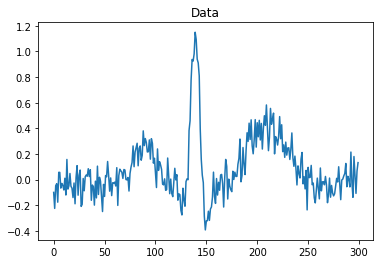

In [7]:
plt.plot(y)
plt.title('Data')
plt.show()

#### Smooting (degree - 2)

D is the second-order difference matrix.
It approximates the second-order derivative.
In order to exploit fast banded solvers
we define D as a sparse matrix using 'spdiags'.

### $f^{"}$(x) = f(i+2) - 2 * f(i+1) + f(i)
[1 -2 1] are the coefficents of second order differential equation

In [95]:
e = np.ones((N,1)) # create a vector with all ones of length N
#spdiags will have the the non zero values position instead of 
#carrying the whole matrix
D = sp.spdiags((e * [1,-2,1]).T,np.array([0,1,2]),N-2,N)

### Derivation for x

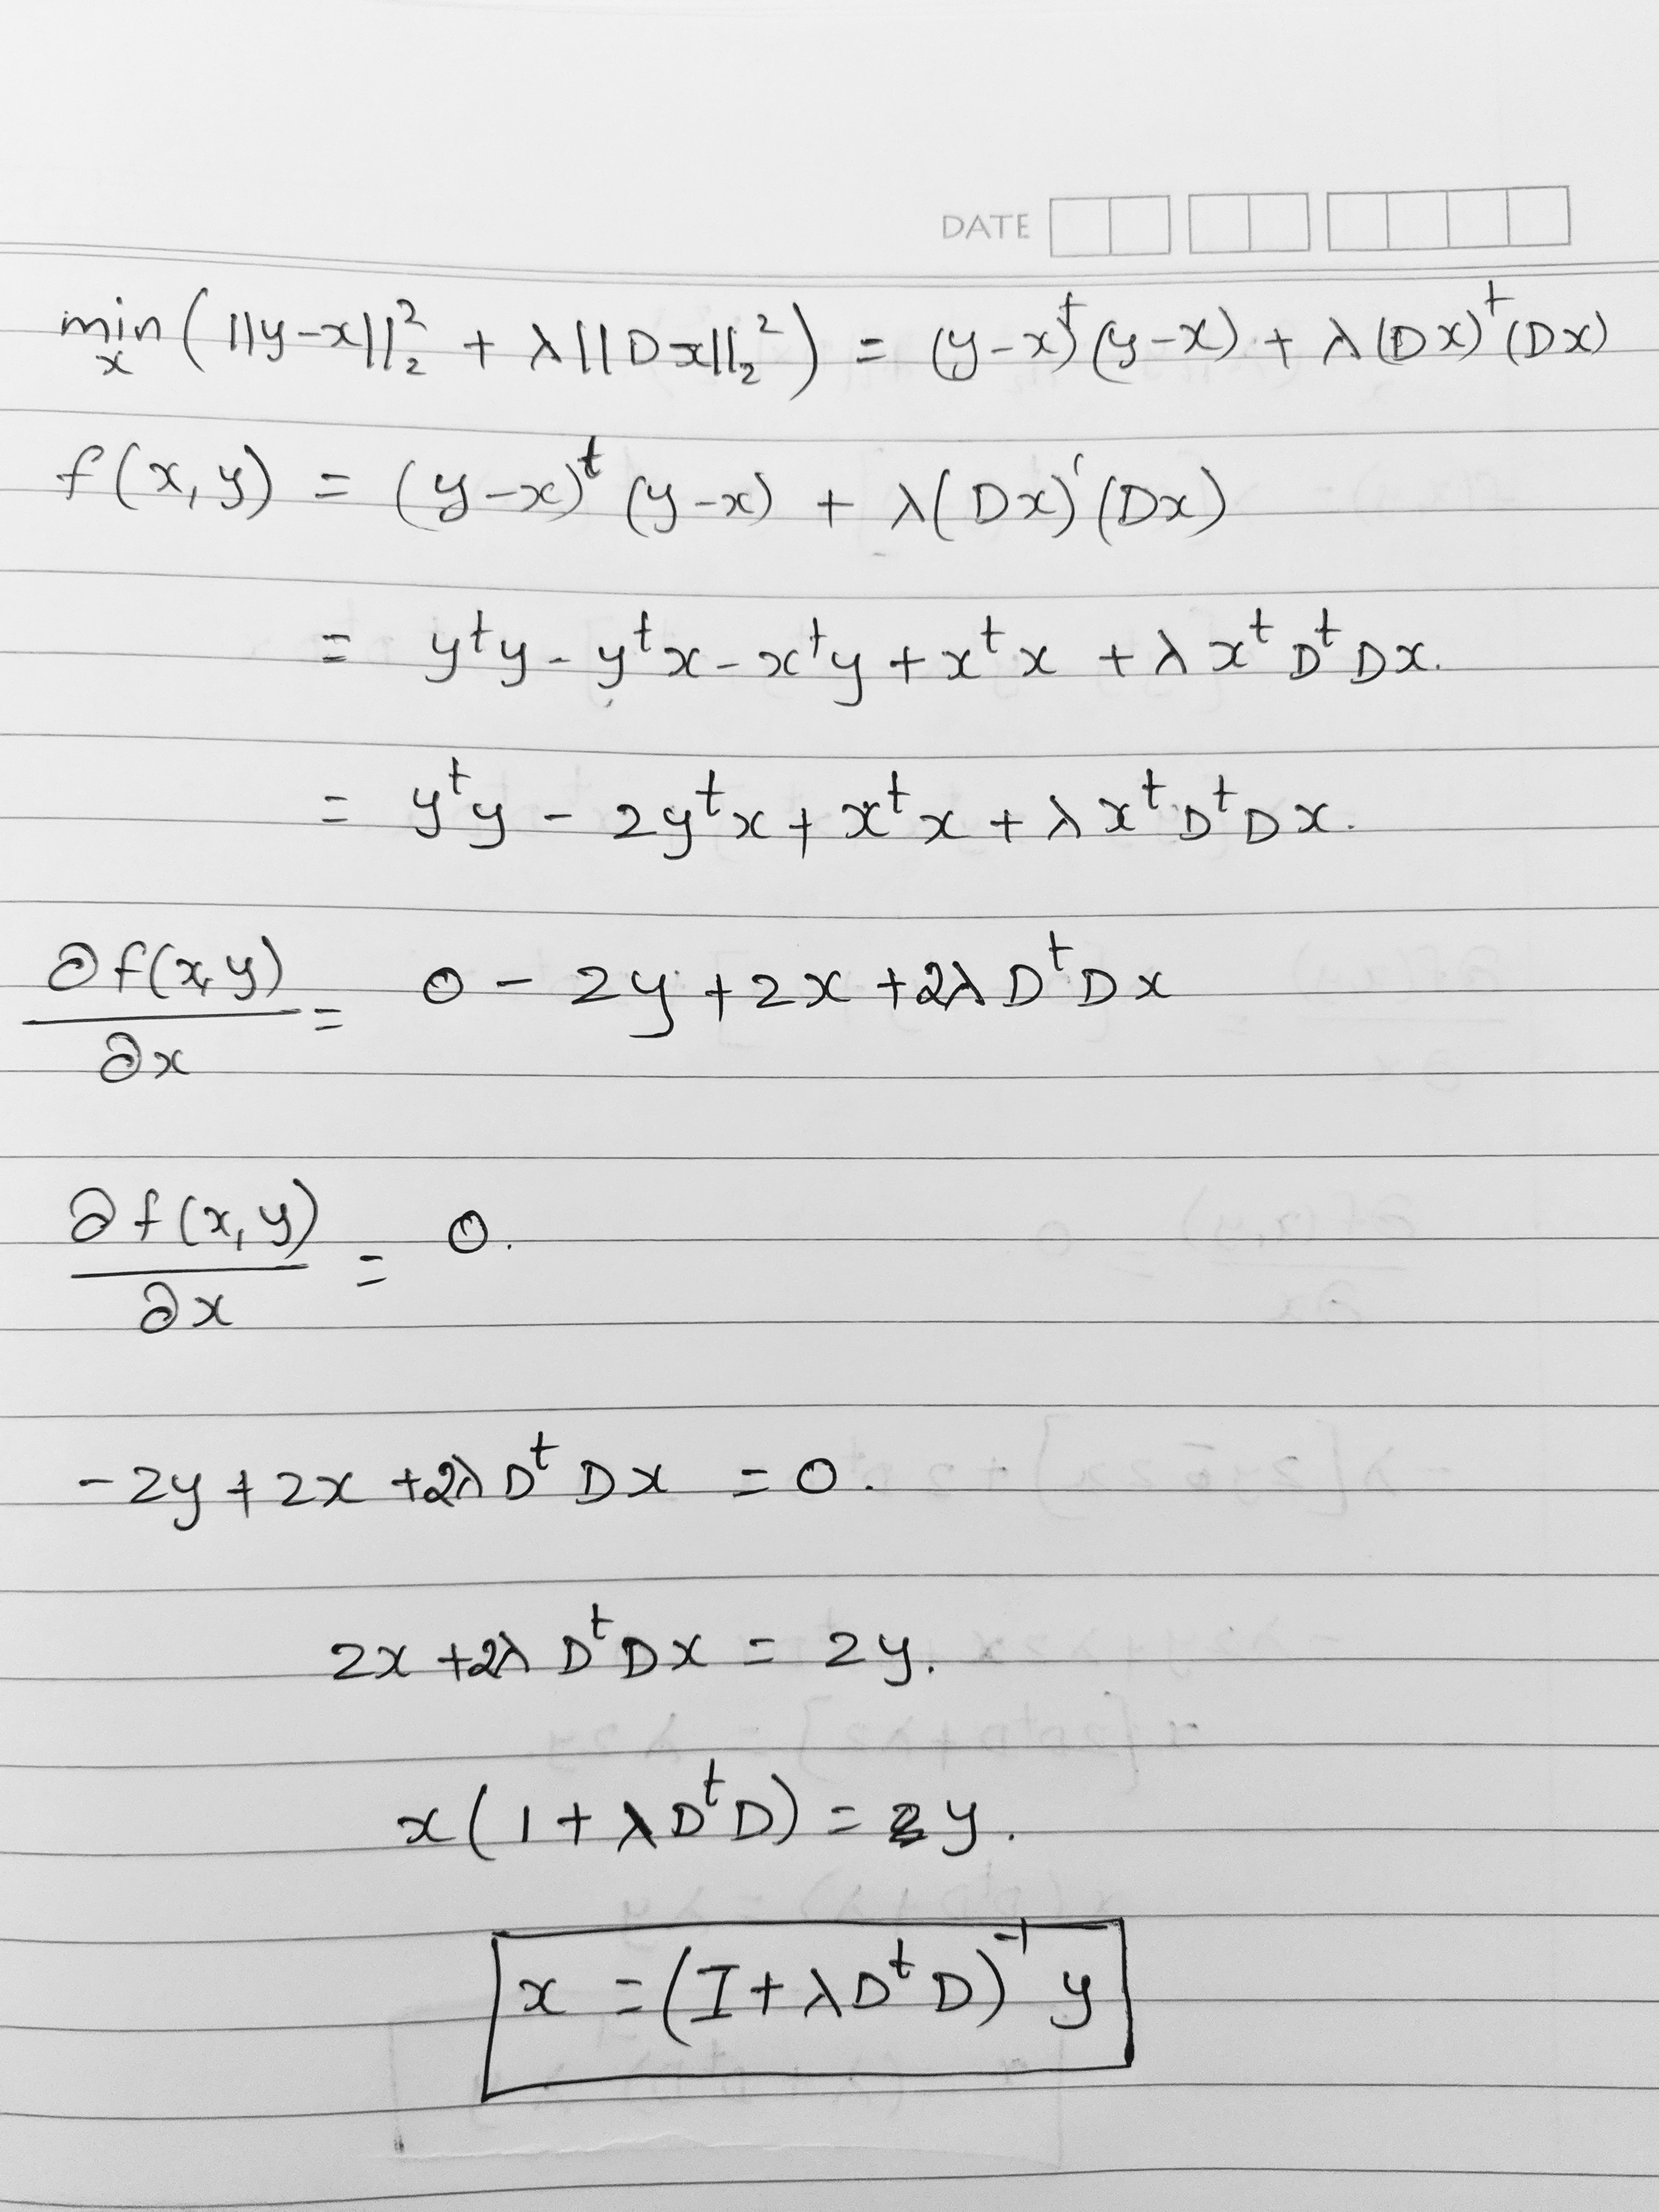

In [144]:
Image("deriv.jpg",width=300,height=200)

In [45]:
lam = 50;
F = sp.eye(N) + lam * D.T * D

In [66]:
#inverse cannot be applied to a sparse matrix 
#since np.linalg.inv get confused to read the matrix
# So first convert that to a matrix and then do inverse operation
F = sp.csr_matrix(F).toarray()

#### Finding x:

In [67]:
#computed signal by least square method
x = np.matmul(np.linalg.inv(F),y)

#### Display the signal 

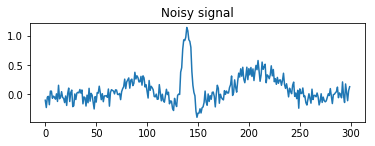

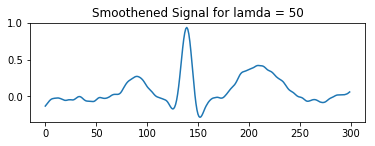

In [72]:
plt.subplot(2,1,1)
plt.plot(y)
plt.title('Noisy signal')
plt.show()
plt.subplot(2,1,2)
plt.plot(x)
plt.title('Smoothened Signal for lamda = 50')
plt.show()

### Question 2

#### Aim:

To justify the output obtained for the control parameter (λ) equal to 0 and 10000 respectively.

In [75]:
# for lamda = 0
lam = 0;
F = sp.eye(N) + lam * D.T * D
#inverse cannot be applied to a sparse matrix 
#since np.linalg.inv get confused to read the matrix
# So first convert that to a matrix and then do inverse operation
F = sp.csr_matrix(F).toarray()
#computed signal by least square method
x1 = np.matmul(np.linalg.inv(F),y)

#for lamda = 10000
lam = 10000
F = sp.eye(N) + lam * D.T * D
#inverse cannot be applied to a sparse matrix 
#since np.linalg.inv get confused to read the matrix
# So first convert that to a matrix and then do inverse operation
F = sp.csr_matrix(F).toarray()
#computed signal by least square method
x2 = np.matmul(np.linalg.inv(F),y)

#### Display the signal 

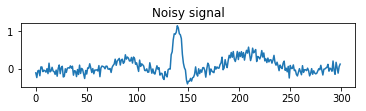

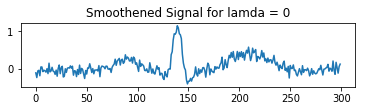

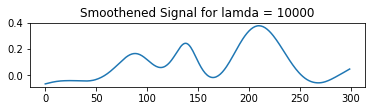

In [76]:
plt.subplot(3,1,1)
plt.plot(y)
plt.title('Noisy signal')
plt.show()
plt.subplot(3,1,2)
plt.plot(x1)
plt.title('Smoothened Signal for lamda = 0')
plt.show()
plt.subplot(3,1,3)
plt.plot(x2)
plt.title('Smoothened Signal for lamda = 10000')
plt.show()

#### Inference

###  $\underset{x}{\operatorname{min}}$ ($||y-x||_{2}^{2}$ + $\lambda$ $||Dx||_{2}^{2}$)

1. For lamda = 0 you can see that the output came is same as input(y=x) means there is no impact by the second portion of the above formula.
2. For lamda = 10000 we get the smooth signal but the information is missed which may lead to dead signal if we increase further. lamda should be optimized in such a way that we hold our information. 

### Question 3

#### Aim:

To justify the output obtained for the control parameter (λ) equal to 0 and 10000 respectively for the
below given problem formulation.

### $\underset{x}{\operatorname{min}}$ ($\lambda$ $||y-x||_{2}^{2}$ + $||Dx||_{2}^{2}$)

### Derivation for x

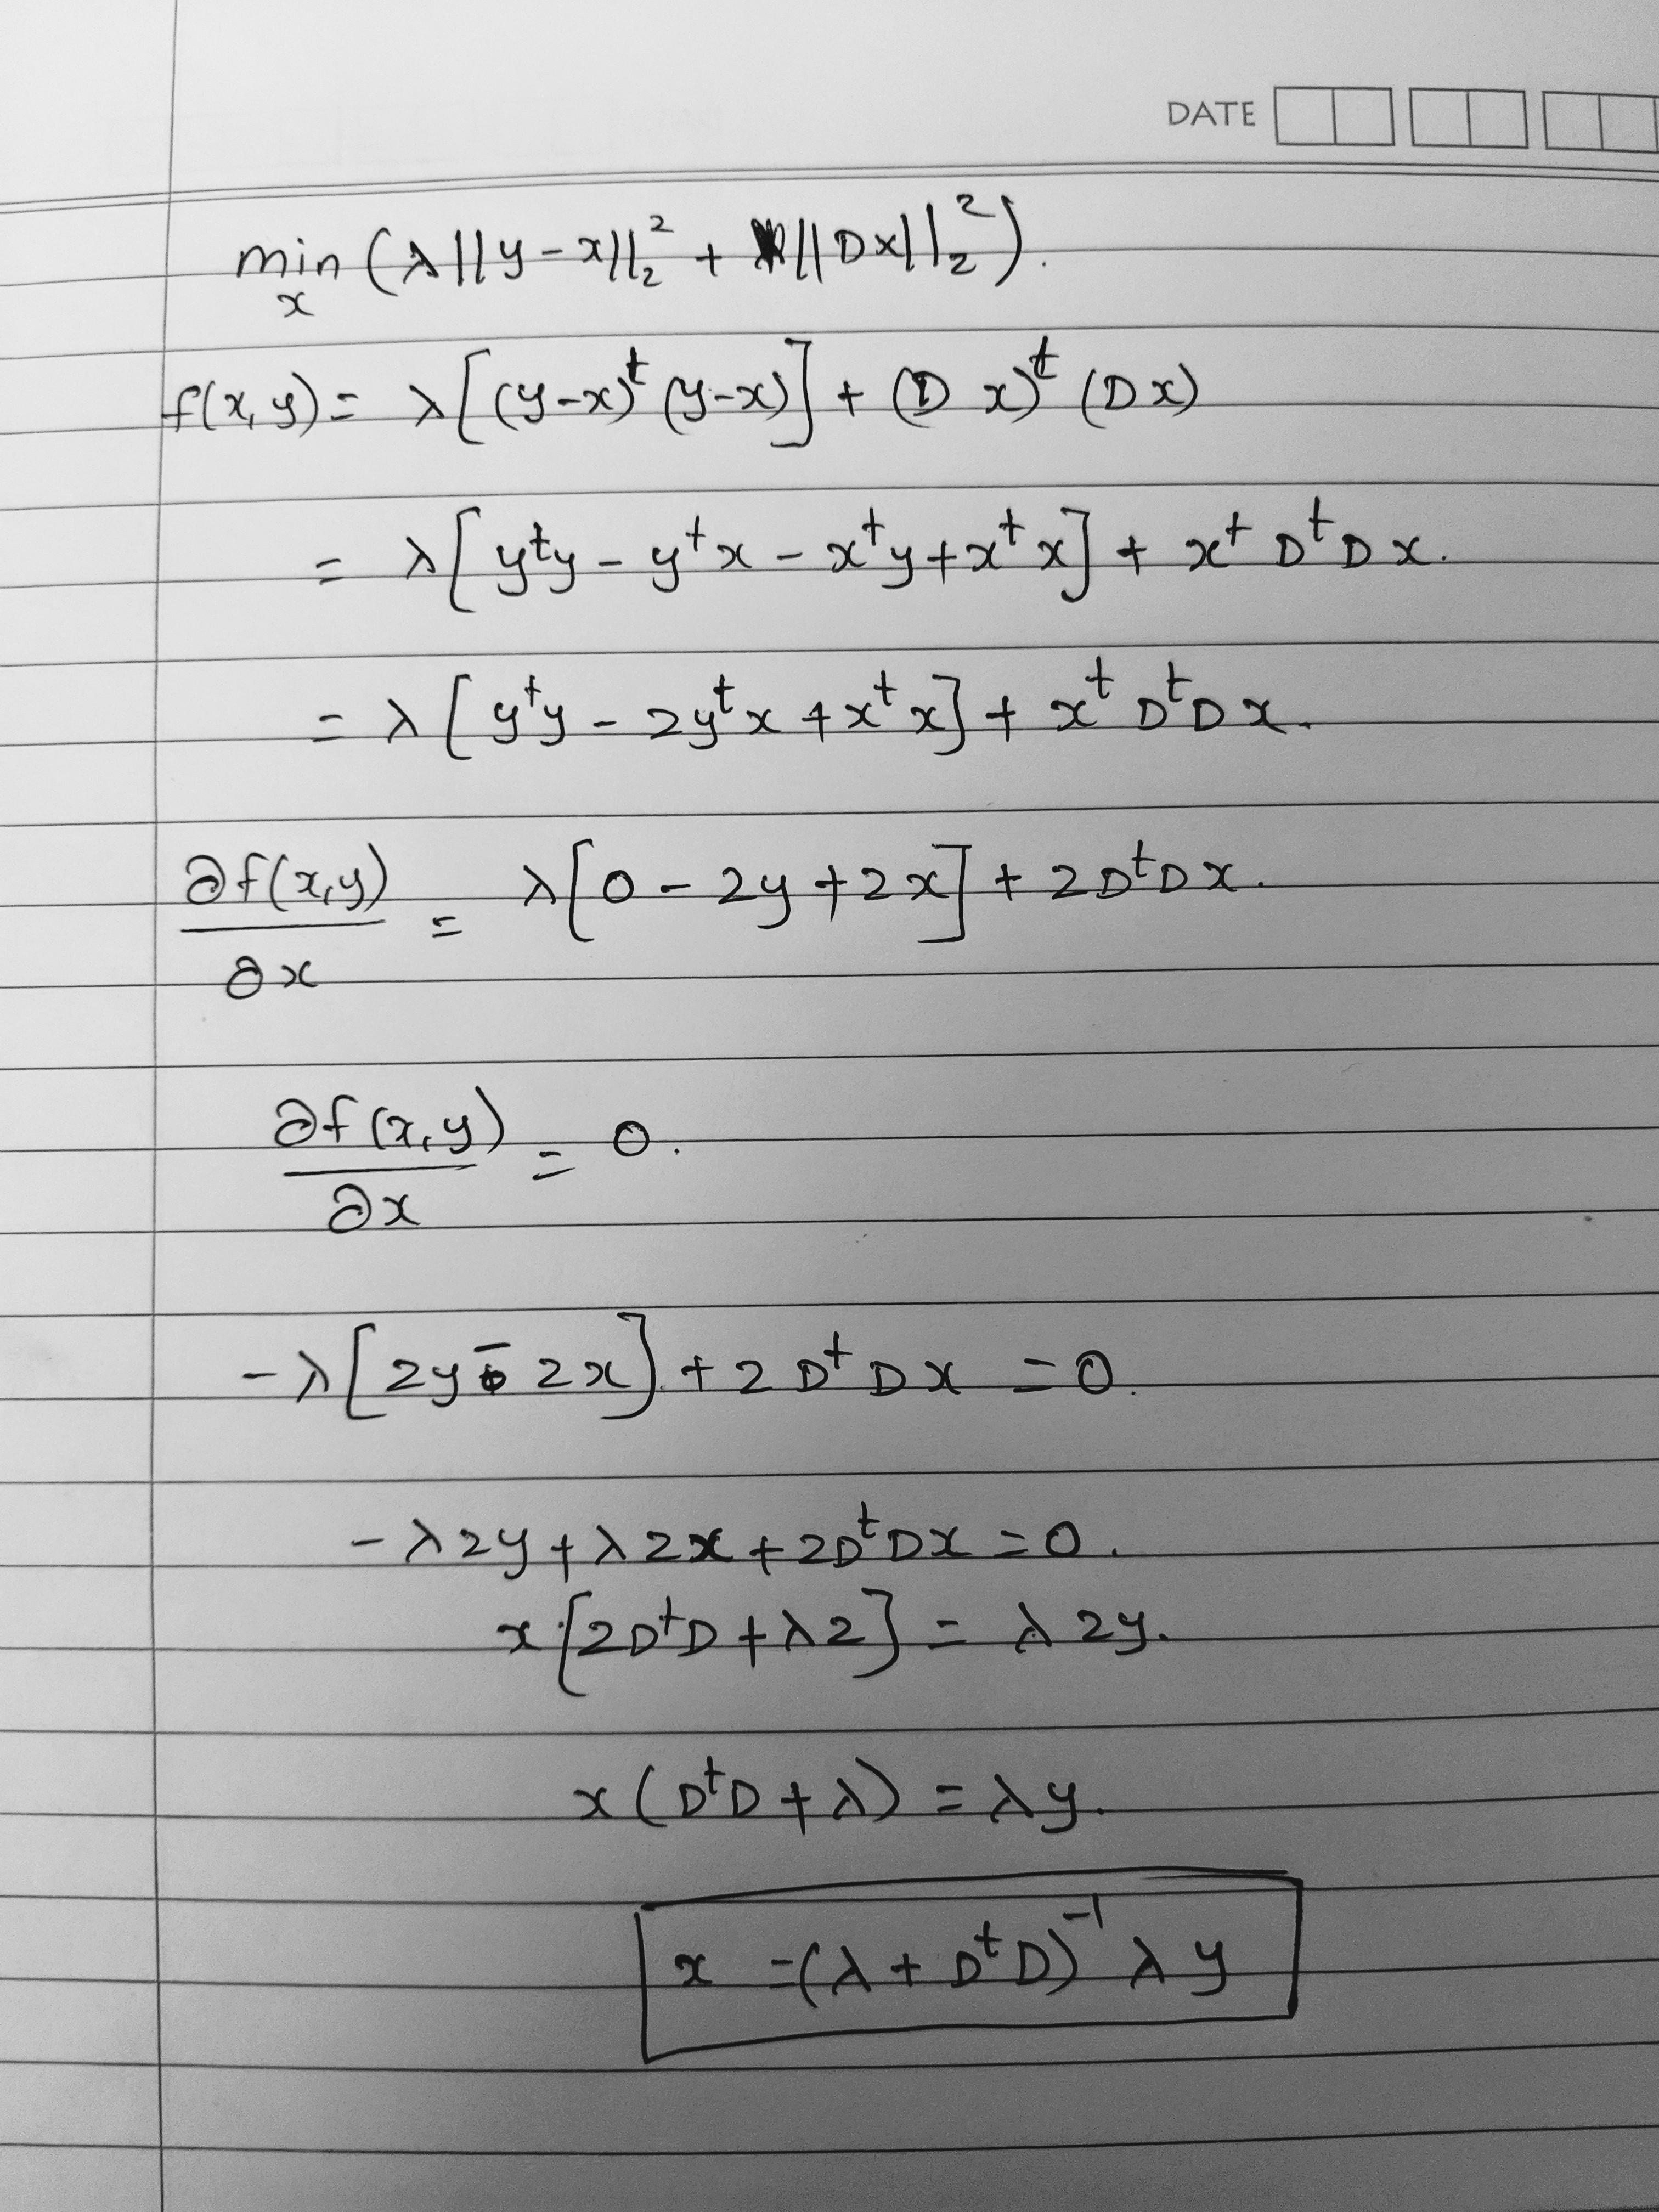

In [145]:
Image("x_derivative.jpg",width=300,height=200)

In [112]:
# for lamda = 0
lam = 0;
F = lam * sp.eye(N) + D.T * D
#inverse cannot be applied to a sparse matrix 
#since np.linalg.inv get confused to read the matrix
# So first convert that to a matrix and then do inverse operation
F = sp.csr_matrix(F).toarray()
#computed signal by least square method
x1 = lam * np.matmul(np.linalg.inv(F),y)

#for lamda = 10000
lam = 10000
F = lam * sp.eye(N) + D.T * D
#inverse cannot be applied to a sparse matrix 
#since np.linalg.inv get confused to read the matrix
# So first convert that to a matrix and then do inverse operation
F = sp.csr_matrix(F).toarray()
#computed signal by least square method
x2 = lam * np.matmul(np.linalg.inv(F),y)

#### Display the signal 

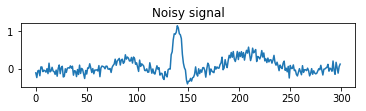

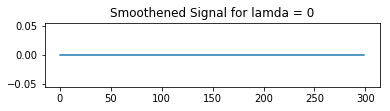

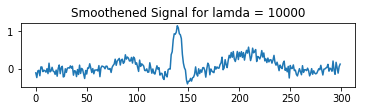

In [113]:
plt.subplot(3,1,1)
plt.plot(y)
plt.title('Noisy signal')
plt.show()
plt.subplot(3,1,2)
plt.plot(x1)
plt.title('Smoothened Signal for lamda = 0')
plt.show()
plt.subplot(3,1,3)
plt.plot(x2)
plt.title('Smoothened Signal for lamda = 10000')
plt.show()

#### Inference

### $\underset{x}{\operatorname{min}}$ ($\lambda$ $||y-x||_{2}^{2}$ + $||Dx||_{2}^{2}$) 

In this case,
1. For lamda = 0, we get x = 0 means the whole data is lost.
2. For lamda = 10000, the more importance is given to the input than the second part of the equation. When lamda increases, y-x is becoming zero means we are getting the same input noisy signal.So lamda should be lesser to get the smooth signal.

### Question 4

### Aim:

In the below given problem formulation for signal denoising, change the D matrix to the first order
derivative and obtain the solution. Use the signal and the code given for least square solutions for signal
denoising. Replace the ‘D’ matrix from the second order to the first order and obtain the result.

### $\underset{x}{\operatorname{min}}$ ($\lambda$ $||y-x||_{2}^{2}$ + $||Dx||_{2}^{2}$) 

#### Smooting (degree - 1)

### $f^{'}$(x) = f(i+1) + f(i) 
[1 -1] are the coefficents of second order differential equation

In [118]:
e = np.ones((N,1)) # create a vector with all ones of length N
#spdiags will have the the non zero values position instead of 
#carrying the whole matrix
D = sp.spdiags((e * [1,-1]).T,np.array([0,1]),N-1,N)

### Finding x:

In [119]:
# for lamda = 20
lam = 20;
F = sp.eye(N) + lam * D.T * D
#inverse cannot be applied to a sparse matrix 
#since np.linalg.inv get confused to read the matrix
# So first convert that to a matrix and then do inverse operation
F = sp.csr_matrix(F).toarray()
#computed signal by least square method
x = np.matmul(np.linalg.inv(F),y)

#### Display the signal 

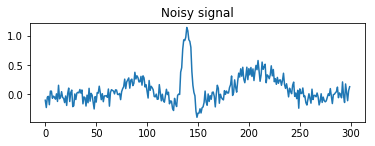

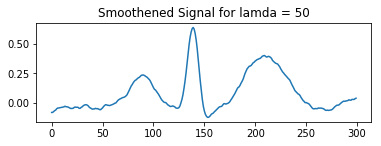

In [117]:
plt.subplot(2,1,1)
plt.plot(y)
plt.title('Noisy signal')
plt.show()
plt.subplot(2,1,2)
plt.plot(x)
plt.title('Smoothened Signal for lamda = 20')
plt.show()

#### Inference

While using first order derivative the smoothing happened in lesser lamda value compared to second order derivative